Found 653 images belonging to 2 classes.
Found 232 images belonging to 2 classes.
Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 144ms/step - acc: 0.5051 - loss: 1.4090 - val_acc: 0.7328 - val_loss: 0.8614
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 129ms/step - acc: 0.6852 - loss: 0.9027 - val_acc: 0.8879 - val_loss: 0.6812
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - acc: 0.7964 - loss: 0.7310 - val_acc: 0.9267 - val_loss: 0.5607
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - acc: 0.8396 - loss: 0.6850 - val_acc: 0.9397 - val_loss: 0.4949
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - acc: 0.8763 - loss: 0.6029 - val_acc: 0.9397 - val_loss: 0.4647
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step - acc: 0.8750 - loss: 0.5714 - val_acc: 0.9483 - val_loss: 0.4372
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - acc: 0.8900 - loss: 0.5358 - val_acc: 0.9483 - val_loss: 0.4151
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - acc: 0.9095 - 

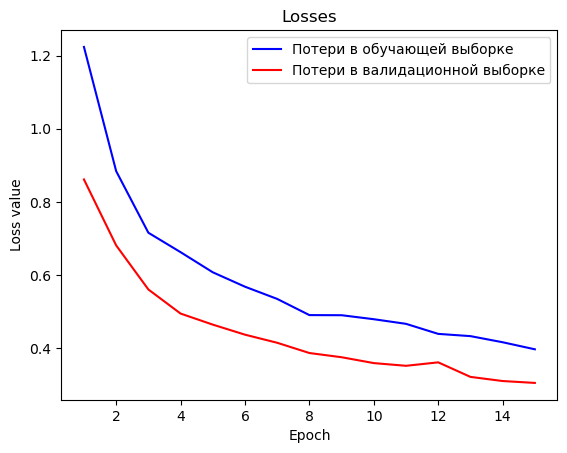

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


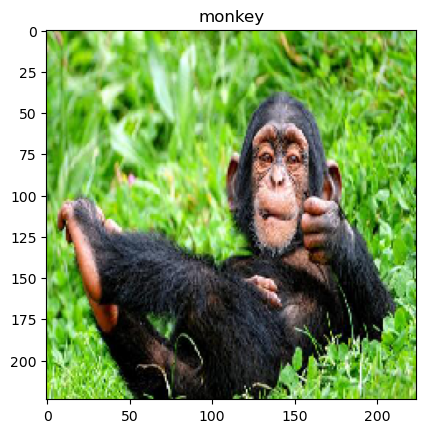

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


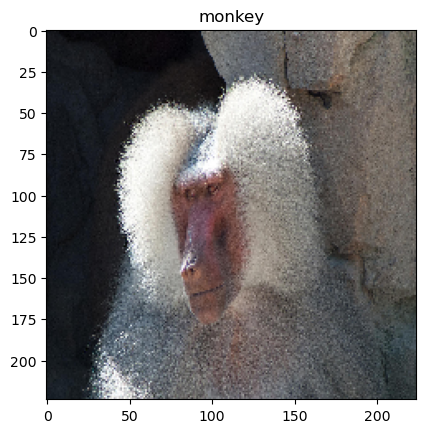

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


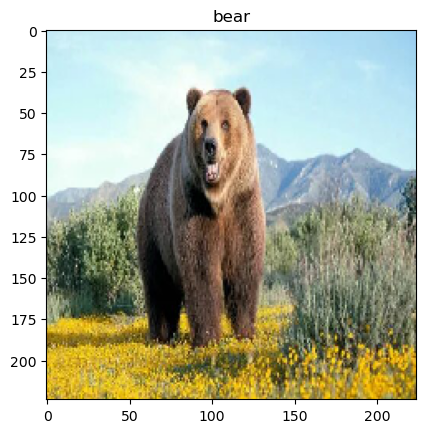

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


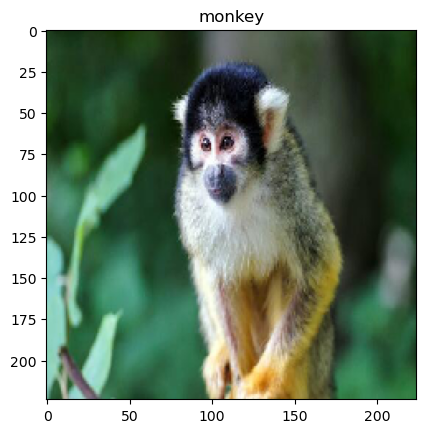

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


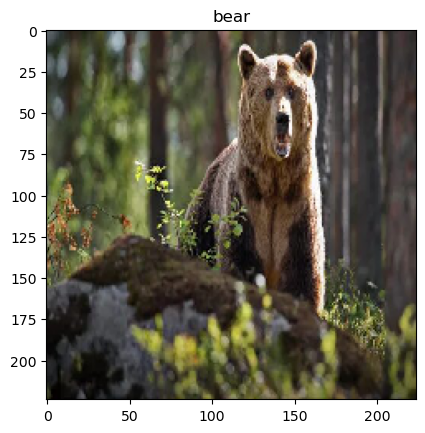

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


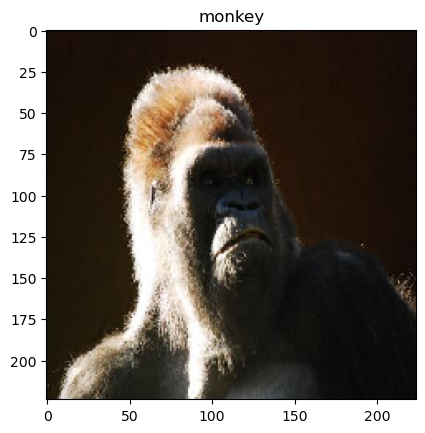

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


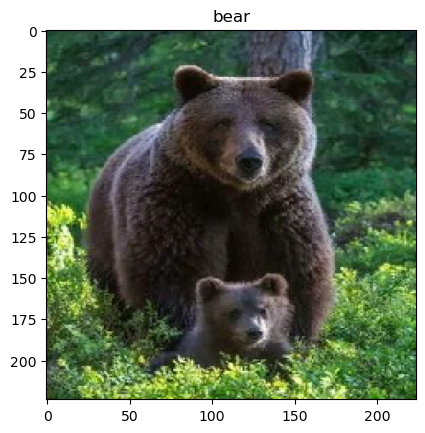

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


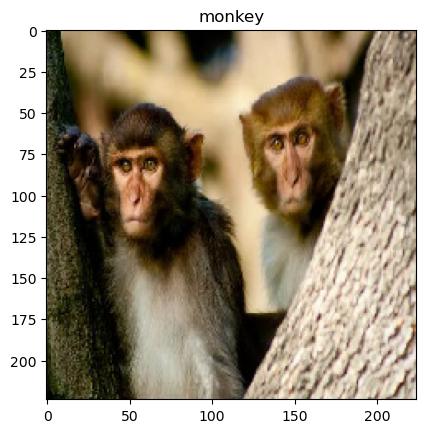

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


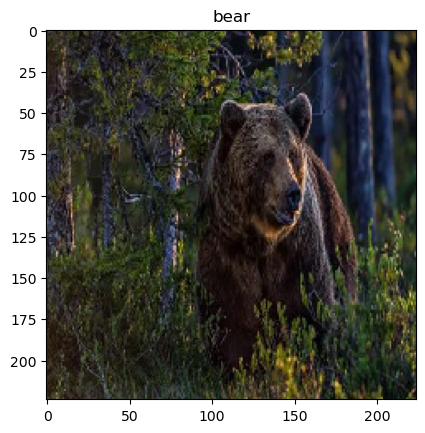

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


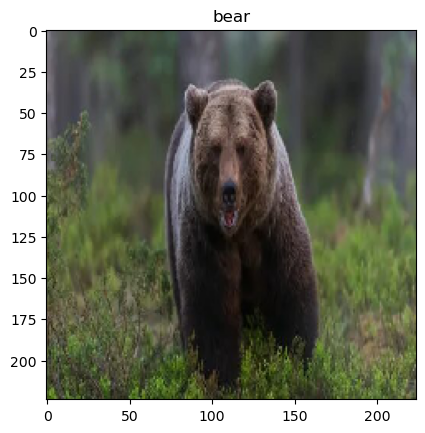

In [5]:
# Импорт библиотек
import tensorflow as tf  # Основная библиотека для машинного обучения и нейронных сетей
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Модуль для генерации и аугментации изображений
from tensorflow.keras.models import Model  # Базовый класс для создания модели
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D  # Слои нейронной сети
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input  # Pre-trained модель MobileNet и функция для предобработки изображений
from tensorflow.keras.preprocessing import image  # Модуль для работы с изображениями
import matplotlib.pyplot as plt  # Библиотека для визуализации данных
import numpy as np  # Библиотека для работы с массивами
from PIL import Image  # Модуль для работы с изображениями
import os  # Модуль для работы с файловой системой
import random  # Модуль для работы с случайными числами
import math  # Модуль для математических операций

# Параметры данных и модели
TRAIN_DATA_DIR = 'MakakiMedvedi/train'  # Путь к каталогу с обучающими данными
VALIDATION_DATA_DIR = 'MakakiMedvedi/test'  # Путь к каталогу с данными для валидации
TRAIN_SAMPLES = 1000  # Количество тренировочных примеров
VALIDATION_SAMPLES = 200  # Количество примеров для валидации
NUM_CLASSES = 2  # Количество классов (макаки и медведи)
IMG_WIDTH, IMG_HEIGHT = 224, 224  # Размеры изображений
BATCH_SIZE = 5  # Размер пакета данных

# Генераторы данных с аугментацией для обучения
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Предобработка изображений
    rotation_range=30,  # Диапазон поворота изображений
    width_shift_range=0.3,  # Диапазон горизонтального сдвига
    height_shift_range=0.3,  # Диапазон вертикального сдвига
    zoom_range=0.3,  # Диапазон масштабирования
    shear_range=0.2,  # Диапазон сдвига
    horizontal_flip=True,  # Горизонтальное отражение
    vertical_flip=True  # Вертикальное отражение
)

# Генератор данных для валидации
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Предобработка изображений
)

# Генератор данных для обучения
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,  # Путь к каталогу с обучающими данными
    target_size=(IMG_WIDTH, IMG_HEIGHT),  # Размер изображений
    batch_size=BATCH_SIZE,  # Размер пакета
    shuffle=True,  # Перемешивание данных
    seed=12345,  # Начальное состояние генератора случайных чисел
    class_mode='categorical'  # Режим классификации
)

# Генератор данных для валидации
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,  # Путь к каталогу с данными для валидации
    target_size=(IMG_WIDTH, IMG_HEIGHT),  # Размер изображений
    batch_size=BATCH_SIZE,  # Размер пакета
    shuffle=False,  # Без перемешивания данных
    class_mode='categorical'  # Режим классификации
)

# Функция для создания модели
def model_maker():
    base_model = MobileNet(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))  # Загружаем MobileNet без верхнего слоя
    for layer in base_model.layers:  # Замораживаем все слои базовой модели
        layer.trainable = False
    
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))  # Входной слой
    custom_model = base_model(input)  # Пропускаем данные через базовую модель
    custom_model = GlobalAveragePooling2D()(custom_model)  # Глобальное усредненное пулирование
    custom_model = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(custom_model)  # Полносвязный слой с регуляризацией
    custom_model = Dropout(0.5)(custom_model)  # Слой Dropout для предотвращения переобучения
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)  # Выходной слой с функцией активации softmax
    
    return Model(inputs=input, outputs=predictions)  # Создание модели

model = model_maker()  # Создаем модель

# Компиляция модели
model.compile(
    loss='categorical_crossentropy',  # Функция потерь
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Оптимизатор
    metrics=['acc']  # Метрика для оценки точности
)

num_steps = math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE)  # Вычисляем количество шагов на эпоху

# Обучение модели
history = model.fit(
    train_generator,  # Данные для обучения
    steps_per_epoch=num_steps,  # Количество шагов на эпоху
    epochs=15,  # Количество эпох
    validation_data=validation_generator,  # Данные для валидации
    validation_steps=num_steps  # Количество шагов для валидации
)

# Визуализация потерь
loss_function = history.history['loss']  # Потери на обучающей выборке
val_loss_function = history.history['val_loss']  # Потери на валидационной выборке
epochs = range(1, len(loss_function) + 1)  # Номера эпох

plt.title('Losses')  # Заголовок графика
plt.plot(epochs, loss_function, color='blue', label='Потери в обучающей выборке')  # График потерь на обучающей выборке
plt.plot(epochs, val_loss_function, color='red', label='Потери в валидационной выборке')  # График потерь на валидационной выборке
plt.xlabel('Epoch')  # Подпись оси X
plt.ylabel('Loss value')  # Подпись оси Y
plt.legend()  # Легенда графика
plt.show()  # Показ графика

# Демонстрация работы модели на тестовых изображениях
categ = ['monkey', 'bear']  # Категории (макаки и медведи)
files = []  # Список для хранения путей к изображениям

# Добавляем пути к изображениям медведей в список files
for root, dirs, filenames in os.walk('MakakiMedvedi/test/miha'):
    for filename in filenames:
        files.append(os.path.join(root, filename))

# Добавляем пути к изображениям макак в список files
for root, dirs, filenames in os.walk('MakakiMedvedi/test/Mynke'):
    for filename in filenames:
        files.append(os.path.join(root, filename))

# Проверяем, что количество файлов достаточно для выбора 10 случайных изображений
if len(files) < 10:
    print("Недостаточно изображений для выборки 10 случайных элементов")
else:
    # Выбираем 10 случайных изображений и демонстрируем результаты предсказания модели
    for f in random.sample(files, 10):
        img_path = f  # Путь к изображению
        img = image.load_img(img_path, target_size=(224, 224))  # Загружаем изображение и изменяем его размер
        img_array = image.img_to_array(img)  # Преобразуем изображение в массив numpy
        expanded_img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность для batch
        preprocessed_img = preprocess_input(expanded_img_array)  # Предобрабатываем изображение
        prediction = model.predict(preprocessed_img)  # Делаем предсказание модели
        
        plt.title(categ[np.argmax(prediction)])  # Заголовок графика - предсказанная категория
        plt.imshow(img)  # Показ изображения
        plt.show()  # Отображение графика
